# Introduction to Neural Networks

## Import packages

In [4]:

from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [5]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [9]:
X_train[0].shape

(28, 28)

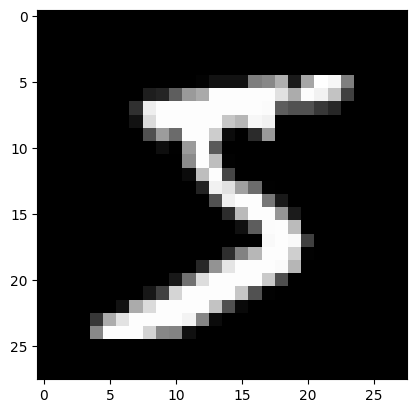

In [10]:
plt.imshow(X_train[0],cmap="gray")

In [11]:
y_train[0]

5

## Preprocessing the image data

In [13]:
image_height,image_width = 28,28

In [19]:
X_train=X_train.reshape(60000,image_height*image_width)

In [20]:
X_test=X_test.reshape(10000,image_height*image_width)

In [21]:
X_train.shape

(60000, 784)

In [22]:
X_test.shape

(10000, 784)

In [26]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train/=255.0
X_test /=255.0
print(X_train[0])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [29]:
model = Sequential()

In [30]:
model.add(Dense(512, activation ="relu",input_shape =(784,)))

In [31]:
model.add(Dense(512,activation ="relu"))
model.add(Dense(10, activation ="softmax"))

## Compile the model

In [32]:
model.compile(optimizer ="Adam", loss ="categorical_crossentropy",metrics =["accuracy"])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [34]:
history = model.fit(X_train,y_train, epochs = 20,validation_data =(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.5385 - accuracy: 0.8354 - val_loss: 0.3057 - val_accuracy: 0.9128
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2619 - accuracy: 0.9222 - val_loss: 0.2064 - val_accuracy: 0.9395
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1905 - accuracy: 0.9429 - val_loss: 0.1669 - val_accuracy: 0.9481
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1472 - accuracy: 0.9559 - val_loss: 0.1254 - val_accuracy: 0.9623
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1171 - accuracy: 0.9645 - val_loss: 0.1098 - val_accuracy: 0.9664
Epoch 6/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0970 - accuracy: 0.9703 - val_loss: 0.1248 - val_accuracy: 0.9619
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0810 - accuracy: 0.9744 - val_loss: 0.0904 - val

## What is the accuracy of the model?

### Plot the accuracy of the training model

In [39]:
history.column

AttributeError: 'History' object has no attribute 'column'

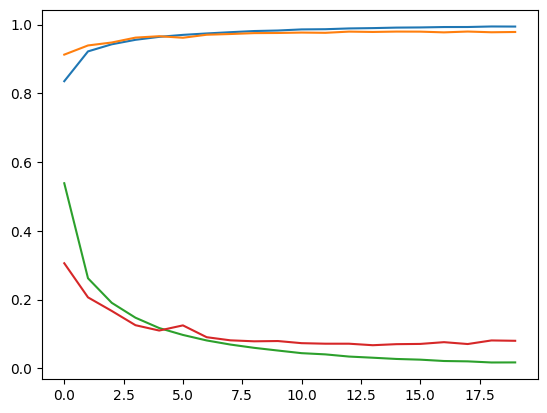

In [40]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plot the accuracy of training and validation set

In [42]:
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 0.0800 - accuracy: 0.9787


[0.07997041940689087, 0.9786999821662903]

### Accuracy of training and validation with loss

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()